In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

# Test peak fit

## Implemented peak functions

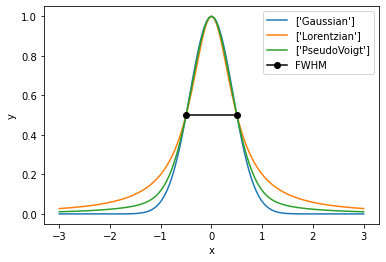

In [2]:
x = np.linspace(-3, 3, 123)

f = Gauss()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = Lorentzian()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = PseudoVoigt()
plt.plot(x, f(x, 0, 1, 1, 0.5), label=f.name);


plt.plot([-.5, .5], [.5, .5], 'o-k', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'function': 'Gaussian', 'x0': 0.5203177737496284, 'x0_std': 0.019791194760961316, 'fwhm': 0.9920817673267165, 'fwhm_std': 0.04870838535925898, 'amplitude': 1.0524833983922952, 'amplitude_std': 0.043381854482396696}
{'function': 'Linear', 'slope': 0.0031562777385396494, 'slope_std': 0.0032842126351274484, 'intercept': 6.9796359415148475, 'intercept_std': 0.010765375504434677}


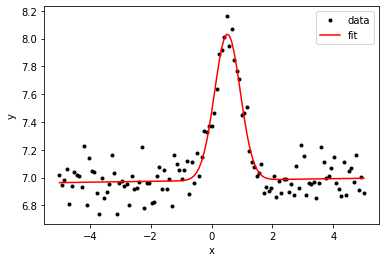

In [3]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## With a linear background

{'function': 'Gaussian', 'x0': 0.5033189324532333, 'x0_std': 0.022013259341479956, 'fwhm': 1.0359974348040255, 'fwhm_std': 0.05428860252691932, 'amplitude': 0.9599614459862503, 'amplitude_std': 0.04216839674831177}
{'function': 'Linear', 'slope': 0.09309721982680108, 'slope_std': 0.0032605020674157255, 'intercept': 6.987554998932356, 'intercept_std': 0.010751960147513697}


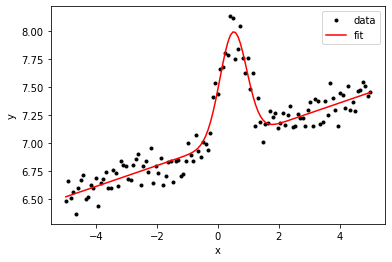

In [4]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

{'function': 'Gaussian', 'x0': 0.5760611294093662, 'x0_std': 0.07000292391081839, 'fwhm': 1.1439310405868945, 'fwhm_std': 0.16484428951225927, 'amplitude': 0.9872907110316828, 'amplitude_std': 0.12323230997524638}


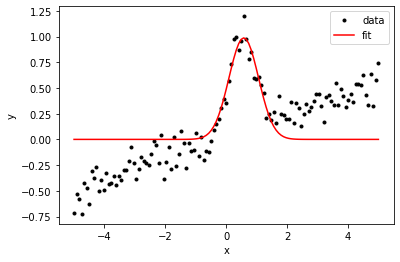

In [5]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Multi-peak

{'function': 'Gaussian', 'x0': -1.4991256395390806, 'x0_std': 0.021598772455958745, 'fwhm': 1.5677733600304122, 'fwhm_std': 0.059080661199269975, 'amplitude': 0.9869696752413599, 'amplitude_std': 0.027998404318999366}
{'function': 'Gaussian', 'x0': 0.4768157988817236, 'x0_std': 0.01915815567075318, 'fwhm': 0.9051437400294864, 'fwhm_std': 0.046616015347476114, 'amplitude': 0.855681767463558, 'amplitude_std': 0.034834045574734906}
{'function': 'Linear', 'slope': 0.0005582508972106588, 'slope_std': 0.002747154540080137, 'intercept': -0.007843412702640594, 'intercept_std': 0.010090243083457394}


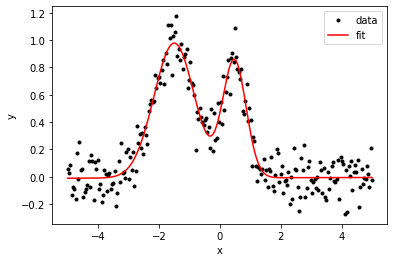

In [6]:
# Generate random data
x = np.linspace(-5, 5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Pseudo Voigt

{'function': 'PseudoVoigt', 'x0': 0.4008738308199108, 'x0_std': 0.0031566764385536888, 'fwhm': 1.0091352244435443, 'fwhm_std': 0.01015716235353788, 'amplitude': 0.9994554660285193, 'amplitude_std': 0.006763794013766258, 'eta': 0.4486981174558306, 'eta_std': 0.027815665386192987}


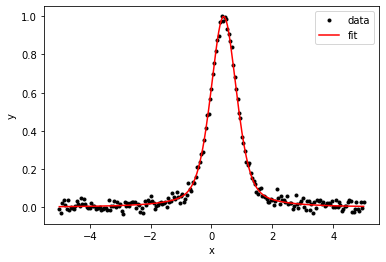

In [7]:
# Generate random data
x = np.linspace(-5, 5, 211)
y = 0.02*np.random.randn(*x.shape)
y += PseudoVoigt()(x, 0.4, 1, 1, 0.4)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, PseudoVoigt(), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();